<a href="https://colab.research.google.com/github/NastuaBudko/machine_learning/blob/main/%D0%91%D1%83%D0%B4%D0%BA%D0%BE_%D0%BF%D1%80_6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Будко А.С. ФІТ 4-8 Варіант 4

# Завдання 1

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import mean_squared_error, r2_score

1. Завантаження та підготовка даних.

In [2]:
california_data = fetch_california_housing()

X = california_data.data
y = california_data.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

2. Побудова регресійної моделі.

In [3]:
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)
y_train_pred = lr_model.predict(X_train)
y_test_pred = lr_model.predict(X_test)

train_mse = mean_squared_error(y_train, y_train_pred)
test_mse = mean_squared_error(y_test, y_test_pred)
train_r2 = r2_score(y_train, y_train_pred)
test_r2 = r2_score(y_test, y_test_pred)

print(f"Навчальні дані MSE: {train_mse:.2f}, R^2 = {train_r2:.2f}")
print(f"Тестові дані MSE: {test_mse:.2f}, R^2 = {test_r2:.2f}")

Навчальні дані MSE: 0.52, R^2 = 0.61
Тестові дані MSE: 0.56, R^2 = 0.58


3. Аналіз перенавчання.

4. Запобігання перенавчанню.

In [4]:
alphas = np.logspace(0, 4, 100)

ridge_cv_scores = []
for alpha in alphas:
    ridge_model = Ridge(alpha=alpha)
    scores = cross_val_score(ridge_model, X_train, y_train, cv=5, scoring='neg_mean_squared_error')
    ridge_cv_scores.append(-scores.mean())

lasso_cv_scores = []
for alpha in alphas:
    lasso_model = Lasso(alpha=alpha)
    scores = cross_val_score(lasso_model, X_train, y_train, cv=5, scoring='neg_mean_squared_error')
    lasso_cv_scores.append(-scores.mean())


best_ridge_alpha = alphas[np.argmin(ridge_cv_scores)]
best_lasso_alpha = alphas[np.argmin(lasso_cv_scores)]

print(f"Найкраще значення Ridge: {best_ridge_alpha}")
print(f"Найкраще значення Lasso: {best_lasso_alpha}")

Найкраще значення Ridge: 8.497534359086444
Найкраще значення Lasso: 1.0


5. Оцінка результатів.

In [5]:
ridge_model = Ridge(alpha=best_ridge_alpha)
ridge_model.fit(X_train, y_train)
ridge_y_test_pred = ridge_model.predict(X_test)

lasso_model = Lasso(alpha=best_lasso_alpha)
lasso_model.fit(X_train, y_train)
lasso_y_test_pred = lasso_model.predict(X_test)

ridge_test_mse = mean_squared_error(y_test, ridge_y_test_pred)
lasso_test_mse = mean_squared_error(y_test, lasso_y_test_pred)
ridge_test_r2 = r2_score(y_test, ridge_y_test_pred)
lasso_test_r2 = r2_score(y_test, lasso_y_test_pred)

print(f"Ridge MSE: {ridge_test_mse:.2f}, R^2 = {ridge_test_r2:.2f}")
print(f"Lasso MSE: {lasso_test_mse:.2f}, R^2 = {lasso_test_r2:.2f}")

Ridge MSE: 0.56, R^2 = 0.58
Lasso MSE: 0.94, R^2 = 0.28


6. Візуалізація та висновки.

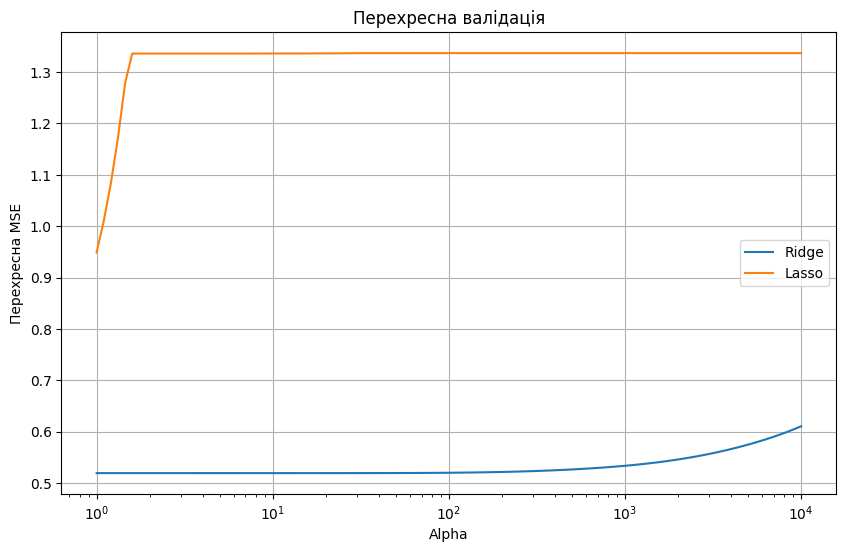

In [6]:
plt.figure(figsize=(10, 6))
plt.semilogx(alphas, ridge_cv_scores, label='Ridge')
plt.semilogx(alphas, lasso_cv_scores, label='Lasso')
plt.xlabel('Alpha')
plt.ylabel('Перехресна MSE')
plt.title('Перехресна валідація')
plt.legend()
plt.grid(True)
plt.show()

# Завдання 2

In [7]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.datasets import fetch_california_housing
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler

1. Виконати кластерізацію даних.

In [8]:
housing = fetch_california_housing()

data = pd.DataFrame(housing.data, columns=housing.feature_names)
data['MedHouseVal'] = housing.target

data.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


2. Затосувати метод ліктя або метод силуєтів.

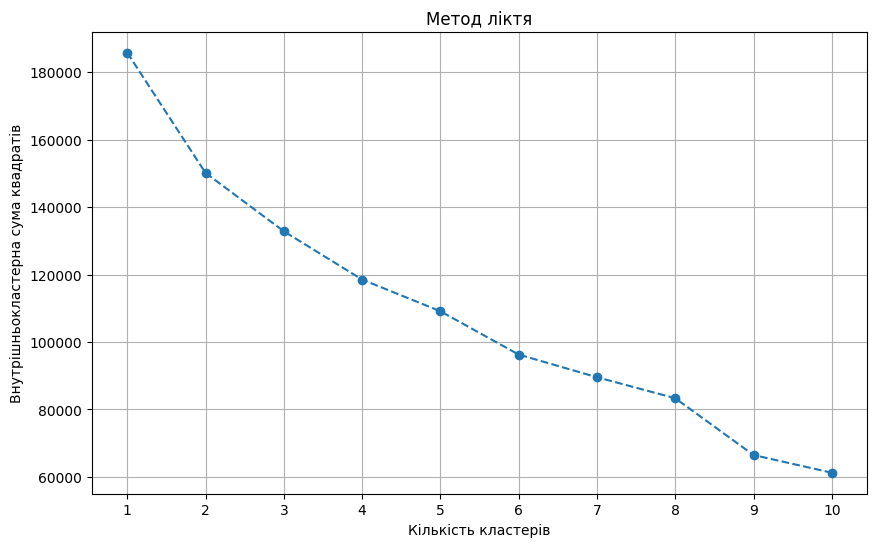

In [9]:
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data)

wcss = []

for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(data_scaled)
    wcss.append(kmeans.inertia_)

plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), wcss, marker='o', linestyle='--')
plt.title('Метод ліктя')
plt.xlabel('Кількість кластерів')
plt.ylabel('Внутрішньокластерна сума квадратів')
plt.xticks(range(1, 11))
plt.grid(True)
plt.show()

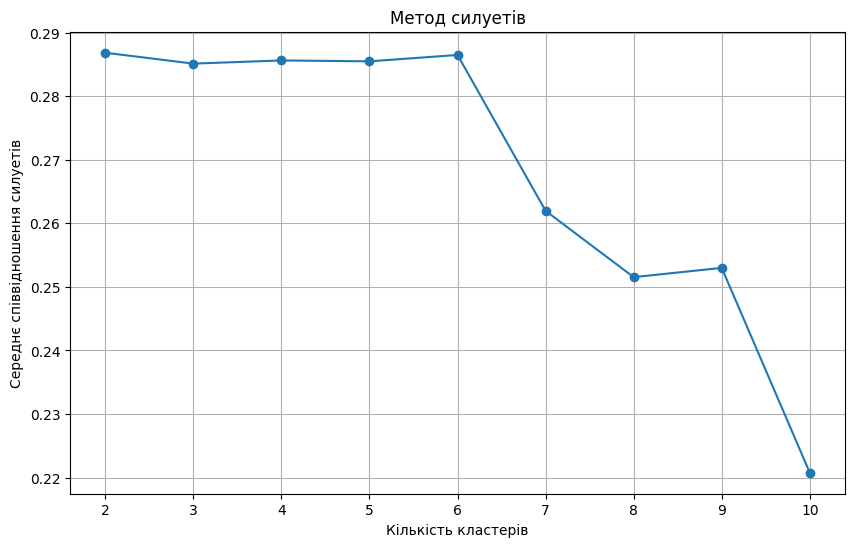

In [10]:
silhouette_scores = []

for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(data_scaled)
    silhouette_avg = silhouette_score(data_scaled, labels)
    silhouette_scores.append(silhouette_avg)

plt.figure(figsize=(10, 6))
plt.plot(range(2, 11), silhouette_scores, marker='o')
plt.title('Метод силуетів')
plt.xlabel('Кількість кластерів')
plt.ylabel('Середнє співвідношення силуетів')
plt.xticks(range(2, 11))
plt.grid(True)
plt.show()

3. Зробити візуалізацію кластерів.

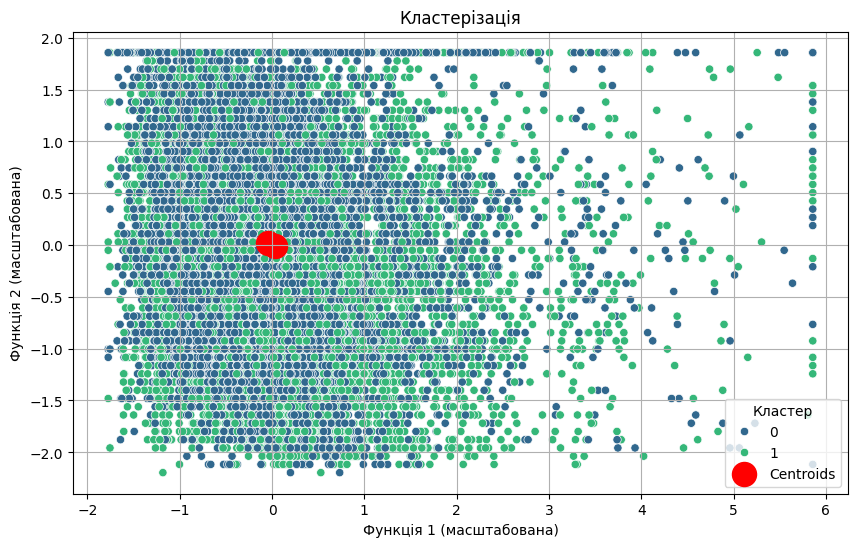

In [11]:
kmeans = KMeans(n_clusters=2, init='k-means++', max_iter=300, n_init=10, random_state=42)
clusters = kmeans.fit_predict(data_scaled)

plt.figure(figsize=(10, 6))
sns.scatterplot(x=data_scaled[:, 0], y=data_scaled[:, 1], hue=clusters, palette='viridis', legend='full')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=300, c='red', label='Centroids')
plt.title('Кластерізація')
plt.xlabel('Функція 1 (масштабована)')
plt.ylabel('Функція 2 (масштабована)')
plt.legend(title='Кластер')
plt.grid(True)
plt.show()

Висновок: Метод ліктя визначає точку "зламу" на графіку суми квадратів відстаней до центрів кластерів (WCSS). Оптимальна кількість кластерів за методом силуетів встановлюється на основі найвищого середнього значення коефіцієнта силуету. Результати обох методів збігаються.